In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
import statsmodels.formula.api as sm

In [153]:
df1 = pd.read_excel('data-vn.xlsx', sheet_name='Note')
df1

,Nguồn:,Tổng cục thống kê
0,Dữ liệu:,VHLSS 2012
1,Địa bàn:,Hà Nội
2,Số quan sát:,420
3,Số biến:,5


In [154]:
df2 = pd.read_excel('data-vn.xlsx', sheet_name='Data')
df2

,Khu vực,Số người,Thu nhập,Chi tiêu,Chi ăn uống
0,Thành thị,1,186.0,71.2,43.7
1,Thành thị,1,18.0,19.2,14.7
2,Thành thị,1,61.5,15.0,11.9
3,Thành thị,1,48.1,57.9,46.9
4,Thành thị,1,30.0,20.6,13.7
...,...,...,...,...,...
415,Nông thôn,8,153.4,104.1,84.8
416,Nông thôn,8,348.5,167.3,100.2
417,Nông thôn,8,220.6,106.9,80.6
418,Nông thôn,9,232.1,173.0,126.6


In [155]:
class LinearRegression:
    def __init__(self, w0, w1, sigma):
        self.w0 = w0
        self.w1 = w1
        self.sigma = sigma
    
    def predict(self, x):
        y_pred = self.w0 + x * self.w1
        return y_pred

    def likelihood(self, x, y):
        y_pred = self.predict(x)
        e = y_pred - y
        l = norm.pdf(e, loc=0, scale=self.sigma)
        return l
    
    def loglikelihood(self, x, y):
        y_pred = self.predict(x)
        e = y_pred - y
        ll = norm.logpdf(e, loc=0, scale=self.sigma)
        return ll


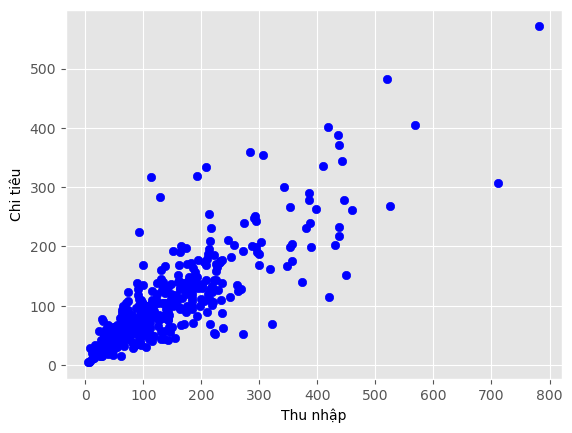

In [156]:
x = df2['Thu nhập']
y = df2['Chi tiêu']

plt.scatter(x, y, color='blue')
plt.xlabel('Thu nhập')
plt.ylabel('Chi tiêu')
plt.show()

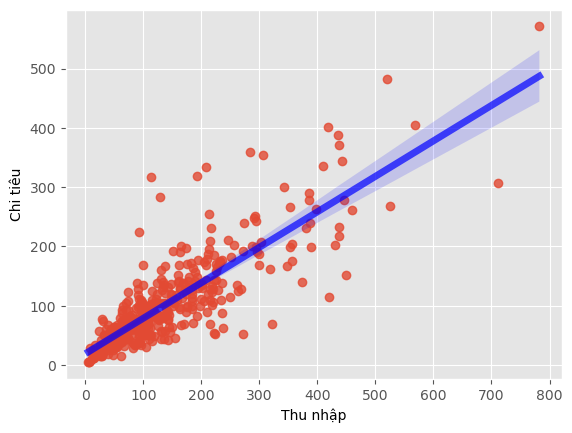

In [157]:
a = sns.regplot(x="Thu nhập", y="Chi tiêu", data=df2, line_kws={"color":"b","alpha":0.7,"lw":5})

In [158]:
results = sm.ols('Q("Chi tiêu") ~ Q("Thu nhập")', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Q("Chi tiêu")   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     967.9
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          7.47e-111
Time:                        10:42:18   Log-Likelihood:                -2179.7
No. Observations:                 420   AIC:                             4363.
Df Residuals:                     418   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        18.8543      3.461      5.448

In [159]:
results = sm.ols('Q("Chi tiêu") ~ Q("Số người")', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Q("Chi tiêu")   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     58.82
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.22e-13
Time:                        10:42:18   Log-Likelihood:                -2403.7
No. Observations:                 420   AIC:                             4811.
Df Residuals:                     418   BIC:                             4820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        32.4058      9.998      3.241

In [160]:
results = sm.ols('Q("Chi tiêu") ~ Q("Số người") + Q("Thu nhập")', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Q("Chi tiêu")   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     484.0
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          2.03e-109
Time:                        10:42:18   Log-Likelihood:                -2179.3
No. Observations:                 420   AIC:                             4365.
Df Residuals:                     417   BIC:                             4377.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.7890      5.899      2.507

Như vậy P_value của số người là 0.395 => không có ý nghĩa thống kê => Không dùng để dự đoán số người

Đối với biến độc lập là biến định tính + biến định lượng thì sẽ không có sự tương tác lẫn nhau. Tuy nhiên trong thực tế thì có sự tương tác. Ta sử dụng 
- Kiểm định Chow
- Thủ tục biến giả

In [161]:
df2['RegionEncode'] = df2['Khu vực']
df2['RegionEncode'] = df2['RegionEncode'].replace({'Thành thị': 1, 'Nông thôn': 0})

results = sm.ols('Q("Chi tiêu") ~ Q("Thu nhập") + Q("Thu nhập") * Q("RegionEncode")', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Q("Chi tiêu")   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     388.4
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          3.34e-120
Time:                        10:42:19   Log-Likelihood:                -2150.9
No. Observations:                 420   AIC:                             4310.
Df Residuals:                     416   BIC:                             4326.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [162]:
results = sm.ols('Q("Chi tiêu") ~ Q("Thu nhập") + Q("RegionEncode")', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Q("Chi tiêu")   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     551.1
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          8.43e-118
Time:                        10:42:19   Log-Likelihood:                -2159.8
No. Observations:                 420   AIC:                             4326.
Df Residuals:                     417   BIC:                             4338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.4002      3.37

### Lựa chọn mô hình tốt nhất

- Nếu n = 2 biến thì số mô hình là 2^2 - 1
- Nếu n = k biến thì số mô hình là 2^k - 1

### Các tiêu chí đánh giá mô hình
- Hệ số R^2 (R-squared) còn được biết là hệ số biến thiên: càng lớn càng tốt
- Hệ số AIC (Akaike Information Criterion): càng nhỏ càng tốt
  - `AIC = n * log(RSS) + 2k`
- Hệ số BIC (Bayesian Information Criterion): càng nhỏ càng tốt
  - `BIC = n * log(RSS) + k * log(n)`

Hai hệ số AIC và BIC để đánh giá overfitting và underfitting. Nếu AIC và BIC càng nhỏ thì mô hình càng tốt. Tuy nhiên nếu AIC và BIC càng nhỏ thì mô hình càng overfitting. Nếu AIC và BIC càng lớn thì mô hình càng underfitting.

In [163]:
df3 = pd.read_csv('eda_data.csv')
df3.drop(['Unnamed: 0'], axis=1, inplace=True)
df3

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,190,0,0,0,1,0,na,senior,6162,3
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,14,1,0,1,1,0,data engineer,senior,6130,3
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,36,0,0,0,0,1,na,na,3078,0
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,-1,0,0,0,0,1,manager,na,1642,0
